In [839]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
import statistics




https://data.gov.ie/dataset/smartbay-ireland-galway-bay-buoy-weather
#https://www.digitalocean.com/community/tutorials/markdown-markdown-images

[![]("https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg")]
<img src="https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg" alt="Image description" width="700" height="300">

### Introduction
My dataset is from Smartbay https://www.smartbay.ie/about which is "Irelands key national facility for advanced marine research and the development of marine technologies, sensors and equipment expanding the Blue Economy and improving our ocean knowledge. It was set up in 1991. I have synthesised a dataset simulating 4 variables. 
1. Air Temperature (Degrees C)
2. Barometric Pressure (inches)
3. Wind Direction (Degrees Magnetic)
4. Wind Speed (Knot)

I will go through the distribuiton I have used to synthesise each variable below.

After reading .csv file, I can see the original dataset contains 8 variables. I decided to drop 4 variables using .drop() to have a more concise dataset.

In [840]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5


Four of the variables in my dataset are float64 variables, also known as the double precision floating point. This datatype is part of the numpy module in python, These usually occupy 64 bits in computer memory. This type of variable can be positive, negative or 0. The IEEE 754 standard specifies a binary64 as having: Sign @ 1 bit,exponent @ 11 bit and Significand precision @ 53 bits (52 explicitly stored) https://en.wikipedia.org/wiki/Double-precision_floating-point_format.                                                                                                                                        The fifth variable is one I created in steps above called datetime is of type datetime64[ns]. This can be either a date unit or time unit. "the date units are years (‘Y’), months (‘M’), weeks (‘W’), and days (‘D’), while the time units are hours (‘h’), minutes (‘m’), seconds (‘s’), milliseconds (‘ms’), and some additional SI-prefix seconds-based units. The datetime64 data type also accepts the string “NAT”, in any combination of lowercase/uppercase letters, for a “Not A Time” value." https://numpy.org/doc/stable/reference/arrays.datetime.html

To display the type of varaiable, I ran .dtypes

1. Air Temperature (Degrees C)                 float64
2. Barometric Pressure (inches)                float64
3. Wind Direction (Degrees Magnetic)           float64
4. Wind Speed (Knot)                           float64
5. datetime                                    datetime64[ns]

In [841]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SensorTimestamp                    267 non-null    object 
 1   Air Temperature (Degrees C)        267 non-null    float64
 2   Barometric Pressure (inches)       267 non-null    float64
 3   Wind Direction (Degrees Magnetic)  267 non-null    float64
 4   Wind Speed (Knot)                  267 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.6+ KB


In [842]:
df1.dtypes

SensorTimestamp                       object
Air Temperature (Degrees C)          float64
Barometric Pressure (inches)         float64
Wind Direction (Degrees Magnetic)    float64
Wind Speed (Knot)                    float64
dtype: object

Below is plot of all 4 variables

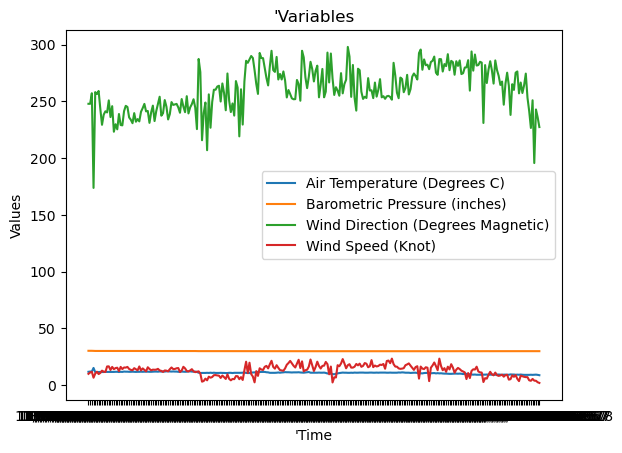

In [843]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

creating new data frame to convert variable SensorTimestamp to dtype: datetime64

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [844]:
df1['SensorTimestamp']


0      11/08/2015 14:54:33
1      11/08/2015 14:54:42
2      11/08/2015 14:56:59
3      13/08/2015 10:50:11
4      13/08/2015 12:02:42
              ...         
262    14/08/2015 23:36:17
263    14/08/2015 23:41:17
264    14/08/2015 23:46:17
265    14/08/2015 23:51:17
266    14/08/2015 23:56:18
Name: SensorTimestamp, Length: 267, dtype: object

In [845]:
pd.to_datetime(df1['SensorTimestamp'])

0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: SensorTimestamp, Length: 267, dtype: datetime64[ns]

new variable datetime added

In [846]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [847]:
df1['datetime']


0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: datetime, Length: 267, dtype: datetime64[ns]

In [848]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


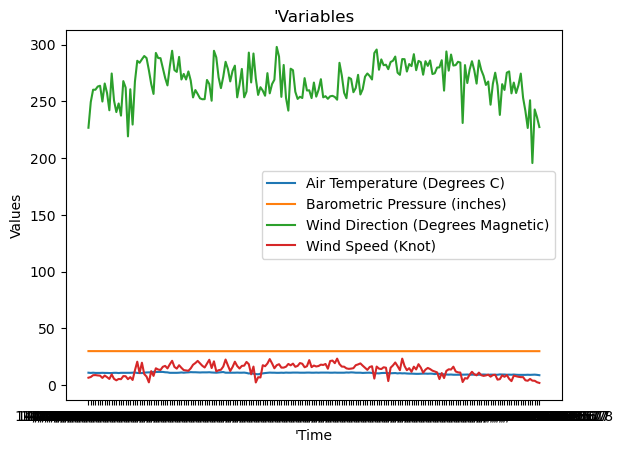

In [849]:
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()
plt.show()

In [850]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


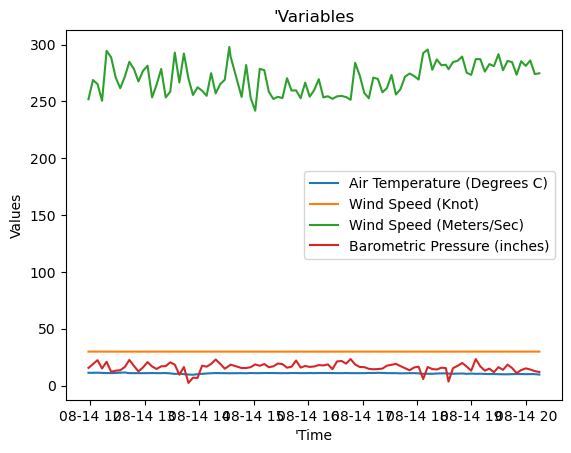

In [851]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

I used .describe() to display count, mean, standard deviation, min, 25%, 50%, 75% and max values. These values especially the mean and standard deviation will be used as inputs into distribution model.

In [852]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


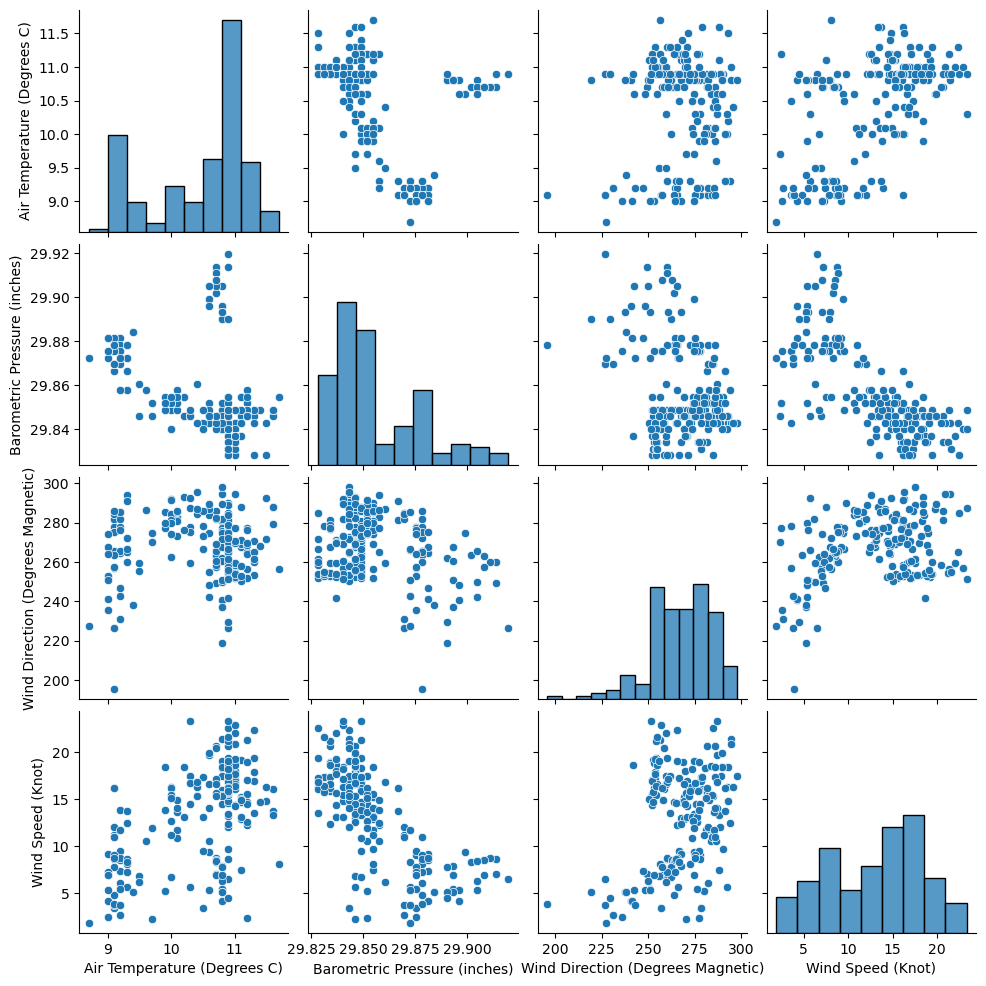

In [853]:
sns.pairplot(df3)
plt.show()

In [854]:
#df3.mode('Air Temperature (Degrees C)')

Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]

In [855]:
#df3

<AxesSubplot:title={'center':'Air Temp vs Barometric Pressure (inches)'}, xlabel='Air Temperature (Degrees C)'>

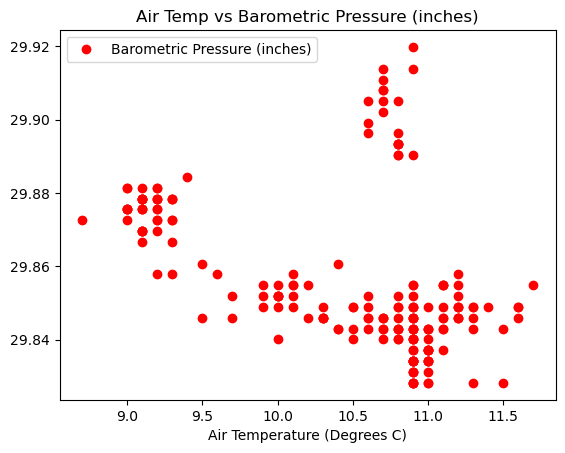

In [856]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

<AxesSubplot:title={'center':'Air Temp and Wind Speed'}, xlabel='Air Temperature (Degrees C)'>

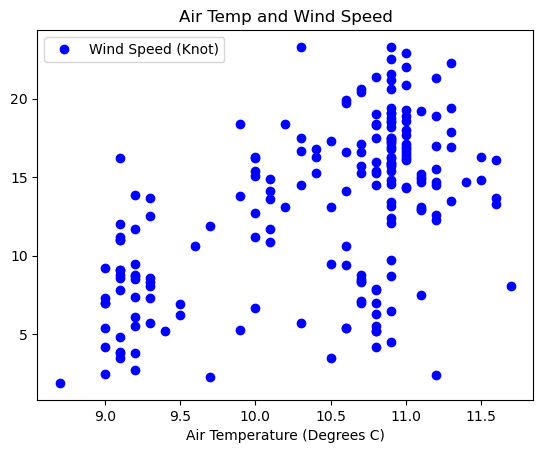

In [857]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='bo', title="Air Temp and Wind Speed")

Displaying data types of each variable using .dtypes command

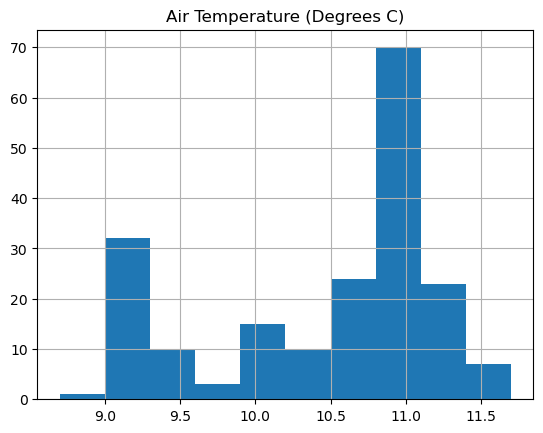

In [858]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [884]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=267, freq="MIN")
#idx1

#random triangular https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

# Define the dataset

data = np.loadtxt('data.csv')

# Calculate the mode
mode = statistics.mode(data)

# Print the mode
print("The mode of the dataset is:", mode)

In [885]:
# Define the left, mode, and right parameters
left = 8.7
mode = 10.9
right = 11.7
np.random.seed(4)

# Generate a random sample of size 1000 from the triangular distribution
d3 = np.random.triangular(left, mode, right, size=267)
d3

array([11.41870232, 10.60045596, 11.44395794, 10.8720464 , 10.84592876,
        9.89423225, 11.46137622,  8.90277989,  9.99216237, 10.39399649,
       10.97234556,  9.84224406, 11.126575  , 11.50040447,  9.73988403,
       10.6855488 ,  8.94353284, 10.29730099,  9.239867  , 11.37745872,
       10.39663428, 11.35006506, 10.98385362, 11.13351462,  9.76906117,
        9.40332117, 10.69120616,  9.75290855, 10.90007025, 10.34186768,
       10.56660072, 11.31292352, 10.55558465,  9.54503037,  9.72189749,
       10.59692844, 10.56039429, 10.7513965 , 10.32784211, 10.77092098,
       10.31849931, 10.72924773, 10.95285338,  9.78684305, 10.27442055,
       10.52118593, 10.8288501 ,  9.99394192, 10.61344968, 10.73089723,
       11.19920343, 10.24752502, 10.75131097,  9.82407573, 10.51257859,
        9.79733298, 11.25741588, 10.3882019 , 11.0616047 , 10.35853056,
       11.22167188, 10.33457837, 10.1784288 , 10.64322307, 11.09095547,
       11.12244857, 10.68281153,  9.44750694, 10.68543688,  9.97

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

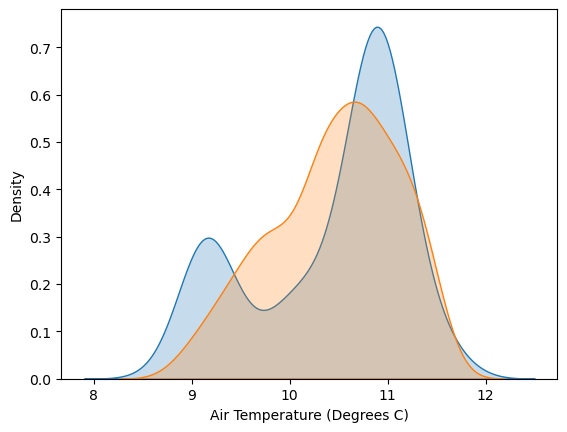

In [886]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((d3),shade=True)

###Wind Direction (Degrees Magnetic)
mean and std dev info from .describe above.

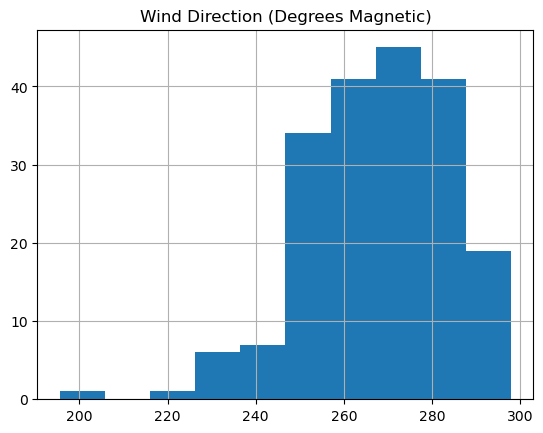

In [887]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

In [888]:
rng4 = np.random.default_rng()
mu1, sigma1 = 267.73, 16.53
ts4 = pd.DataFrame(data=rng4.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

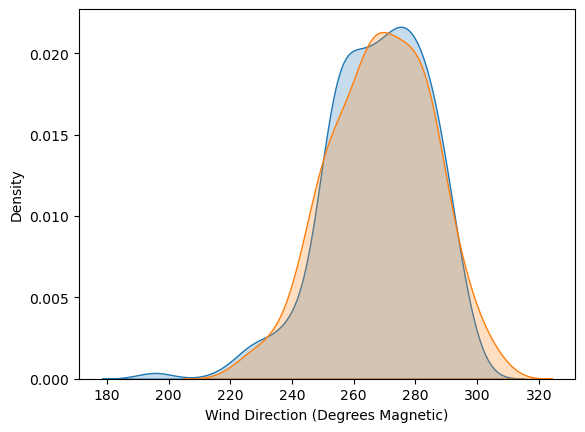

In [889]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True, label="actual")
sns.kdeplot(ts4['Synthesised Wind Direction (Degrees Magnetic)'],shade=True, label="simulated")

###Barometric

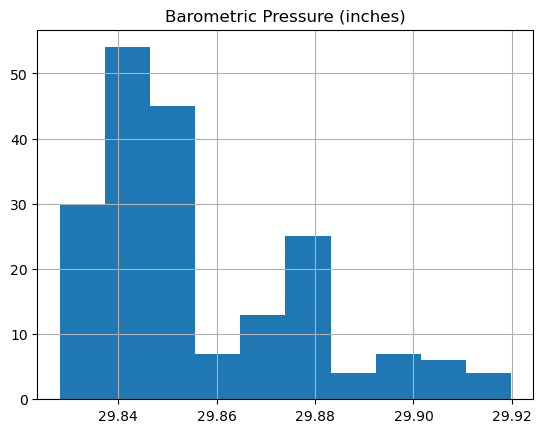

In [890]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [891]:
#16
np.random.seed(90)
rng3 = np.random.default_rng()
mu1, sigma1 = 29.8566, 0.0208
ts3 = pd.DataFrame(data=rng3.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Barometric'])
ts3

,Synthesised Barometric
2023-11-08 00:00:33,29.838101
2023-11-08 00:01:33,29.868447
2023-11-08 00:02:33,29.835907
2023-11-08 00:03:33,29.873584
2023-11-08 00:04:33,29.868686
...,...
2023-11-08 04:22:33,29.854519
2023-11-08 04:23:33,29.877550
2023-11-08 04:24:33,29.888768
2023-11-08 04:25:33,29.883934


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

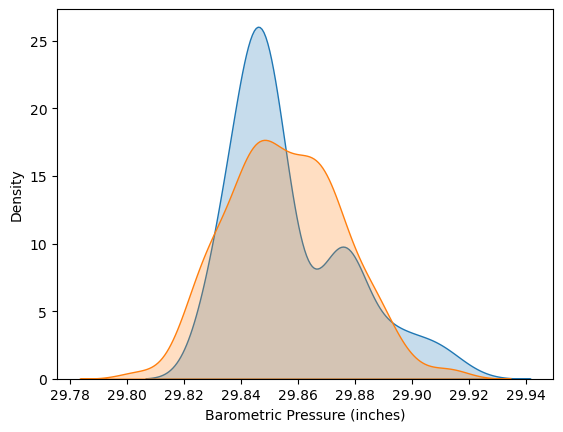

In [892]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts3['Synthesised Barometric'],shade=True)

### wind speed know

In [893]:
np.random.seed(13)
rng1 = np.random.default_rng()
mu1, sigma1 = 13.04, 5.29
ts101 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised knot'])

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

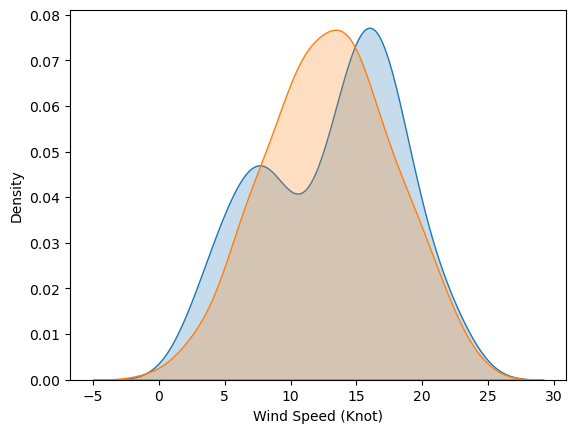

In [894]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot((ts101['Synthesised knot']),shade=True)

In [895]:
import random

random.seed(46) # Set the seed
mu, sigma = 0, 0.1 # mean and standard deviation
r = [random.gauss(29.85, .02) for _ in range(267)] # Generate 5 random numbers from a normal 

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

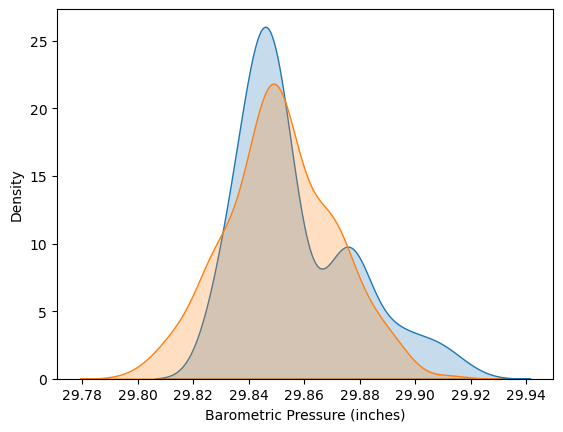

In [896]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot((r),shade=True)

In [897]:
#52,56

#import random
seed =123
random.seed(seed) # Set the seed
t = np.random.normal(29.85, .02,100) # Generate 5 random numbers from a normal 
t

array([29.83575219, 29.86507533, 29.84910994, 29.85903625, 29.87690203,
       29.86064676, 29.87700376, 29.86722423, 29.87957371, 29.82909246,
       29.83422022, 29.82476788, 29.86125694, 29.84513347, 29.86827481,
       29.85634702, 29.85254607, 29.89300766, 29.86212577, 29.84946457,
       29.83031678, 29.87381411, 29.86905661, 29.82825637, 29.84709577,
       29.85475716, 29.81721813, 29.84443731, 29.87798477, 29.81769784,
       29.85981744, 29.88785484, 29.83758041, 29.84092495, 29.85434903,
       29.86028658, 29.85794483, 29.8197431 , 29.83471932, 29.8520254 ,
       29.84365468, 29.87276666, 29.84355753, 29.84259768, 29.88699225,
       29.84836697, 29.83039451, 29.84995222, 29.84535148, 29.8642195 ,
       29.85906317, 29.84334648, 29.84231085, 29.83939345, 29.87700612,
       29.89030442, 29.84884935, 29.86129309, 29.85719065, 29.8397607 ,
       29.83953672, 29.84037257, 29.81151681, 29.83485094, 29.85906962,
       29.86844688, 29.84585301, 29.8424816 , 29.86279768, 29.89

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

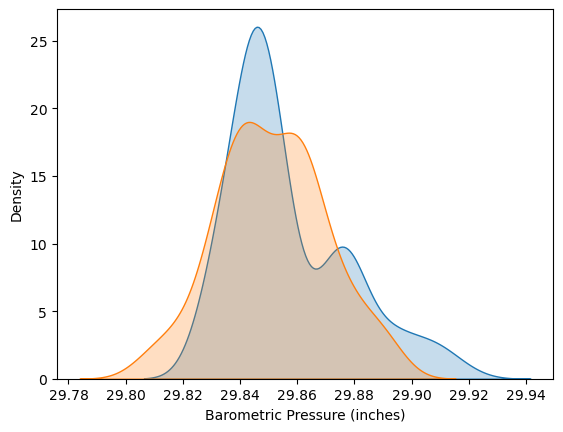

In [898]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot((t),shade=True)

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()


In [899]:
x1 = np.random.normal(13.04,5.29,100)

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

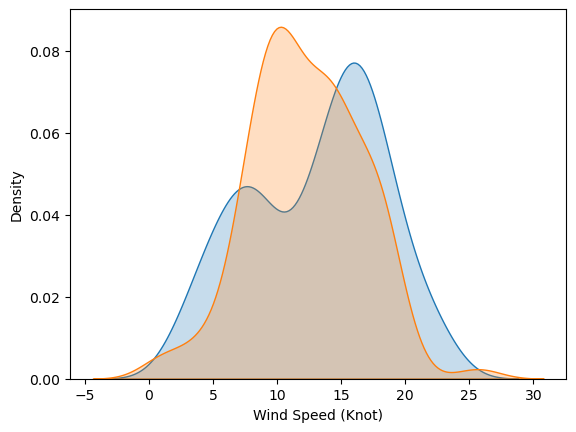

In [900]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot((x1),shade=True)


some ditsributions i tried to to get a better distribution match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform
5. johnsonsu

###standard cauch code below taken from https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html. The min and max values were calculated in .describe() output.

In [901]:

df22=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df22 = df22.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df22

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5


In [902]:


x =df22["Air Temperature (Degrees C)"]
y =df22["Wind Speed (Knot)"]

corr = np.corrcoef(x, y)[0,1]
print("Correlation coefficient:", corr)


Correlation coefficient: 0.3741014023241746


In [903]:
x =df22["Air Temperature (Degrees C)"]
y =df22["Wind Direction (Degrees Magnetic)"]
corr = np.corrcoef(x, y)[0,1]
print("Correlation coefficient:", corr)


Correlation coefficient: -0.4142040752601119


In [904]:
x =df22["Air Temperature (Degrees C)"]
y =df22["Barometric Pressure (inches)"]
corr = np.corrcoef(x, y)[0,1]
print("Correlation coefficient:", corr)


Correlation coefficient: 0.5388767283176291


In [905]:
x =df22["Wind Direction (Degrees Magnetic)"]
y =df22["Wind Speed (Knot)"]
corr = np.corrcoef(x, y)[0,1]
print("Correlation coefficient:", corr)

Correlation coefficient: 0.2685185339252848


In [906]:
x =df22["Wind Direction (Degrees Magnetic)"]
y =df22["Barometric Pressure (inches)"]
corr = np.corrcoef(x, y)[0,1]
print("Correlation coefficient:", corr)

Correlation coefficient: -0.5994238062143338


In [907]:
x =df22["Wind Speed (Knot)"]
y =df22["Barometric Pressure (inches)"]
corr = np.corrcoef(x, y)[0,1]
print("Correlation coefficient:", corr)

Correlation coefficient: -0.14548912274757617


In [908]:
#x = (d3)
x =df22["Barometric Pressure (inches)"]
y =ts3['Synthesised Barometric']

corr = np.corrcoef(x, y)[0,1]
print("Correlation coefficient:", corr)


Correlation coefficient: 0.02862462016920533


In [909]:
x =df22["Air Temperature (Degrees C)"]
y =(d3)

corr = np.corrcoef(x, y)[0,1]
print("Correlation coefficient:", corr)

Correlation coefficient: 0.0970194915002252


In [910]:
ts3['Synthesised Barometric']

2023-11-08 00:00:33    29.838101
2023-11-08 00:01:33    29.868447
2023-11-08 00:02:33    29.835907
2023-11-08 00:03:33    29.873584
2023-11-08 00:04:33    29.868686
                         ...    
2023-11-08 04:22:33    29.854519
2023-11-08 04:23:33    29.877550
2023-11-08 04:24:33    29.888768
2023-11-08 04:25:33    29.883934
2023-11-08 04:26:33    29.842199
Freq: T, Name: Synthesised Barometric, Length: 267, dtype: float64

#standard gamma

for Air temp , Shape parameter (k) = 317.2792120103159
Scale parameter (theta) = 0.05614087677067406

##Uniform Dsitribution

In [911]:
s4 = np.random.uniform(8.7,11.3,100)



<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

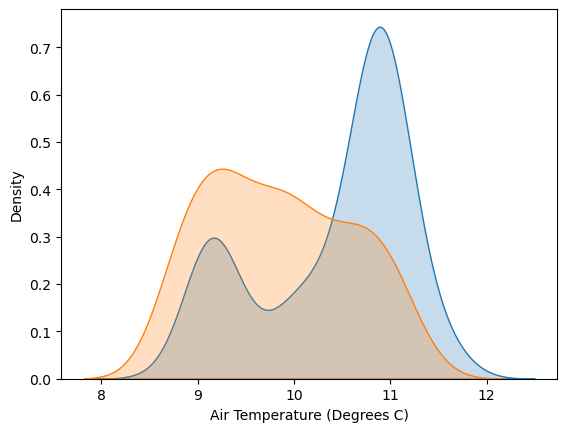

In [912]:

sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s4),shade=True)

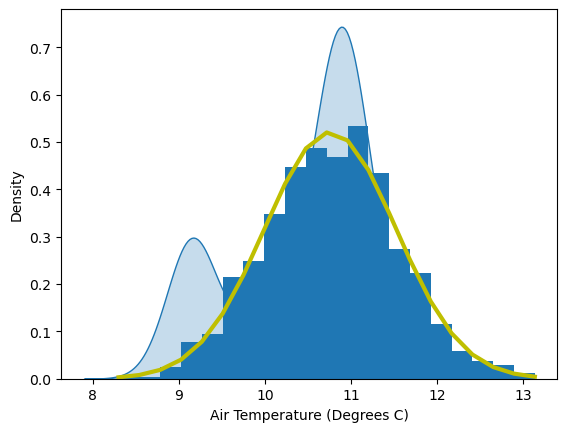

In [913]:
mu, sigma = 10.76, .766
s = np.random.normal(mu, sigma, 1000) # Mean is 40 and std is 1.

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
plt.show()

In [914]:
#idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
#idx2

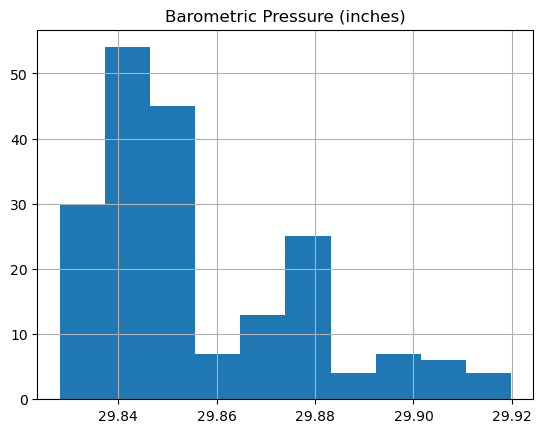

In [915]:
df3.hist('Barometric Pressure (inches)')
plt.show()

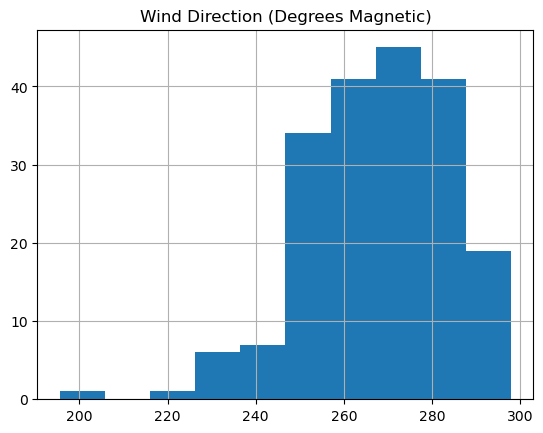

In [916]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

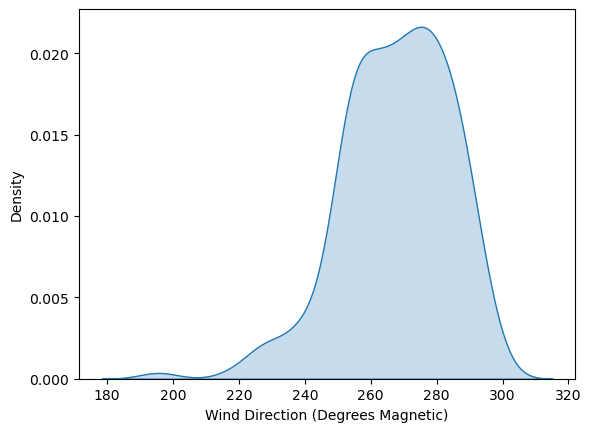

In [917]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [918]:
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [919]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [920]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

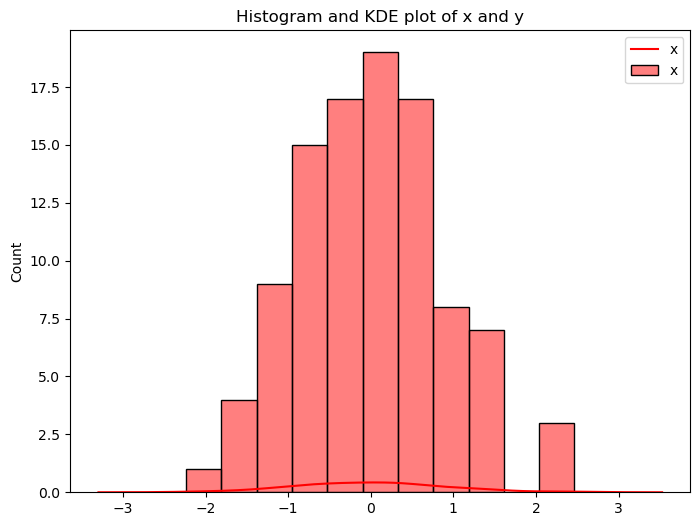

In [921]:
x = np.random.normal(size=100)
#y = np.random.normal(size=100)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a histogram of x and y
sns.histplot(x=x, ax=ax, color='red', alpha=0.5, label='x')
#sns.histplot(x=y, ax=ax, color='green', alpha=0.5, label='y')

# Plot a KDE plot of x and y
sns.kdeplot(x=x, ax=ax, color='red', label='x')
#sns.kdeplot(x=y, ax=ax, color='green', label='y')

# Add legends and titles to the subplot
ax.legend()
ax.set_title('Histogram and KDE plot of x and y')

# Show the plot
plt.show()

In [922]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

In [923]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,298.317970
2023-11-08 00:01:33,254.154703
2023-11-08 00:02:33,280.940540
2023-11-08 00:03:33,253.790147
2023-11-08 00:04:33,229.131998
...,...
2023-11-08 04:22:33,272.488687
2023-11-08 04:23:33,269.900125
2023-11-08 04:24:33,252.194941
2023-11-08 04:25:33,233.908922


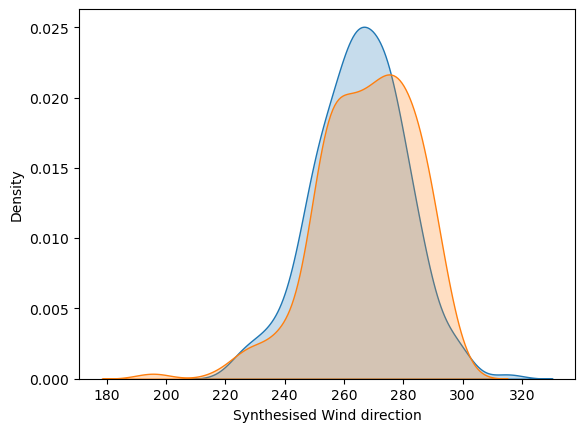

In [924]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)
plt.show()
#sns.histplot('Wind Direction (Degrees Magnetic)',kde = True)

In [925]:
import numpy as np
dt = np.random.poisson(10.76, 100)
#dt

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

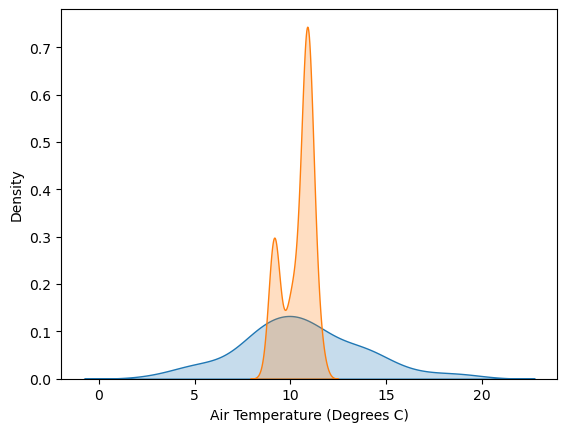

In [926]:
sns.kdeplot((dt),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [927]:

values = np.random.rayleigh(10.76, 200)
#values

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

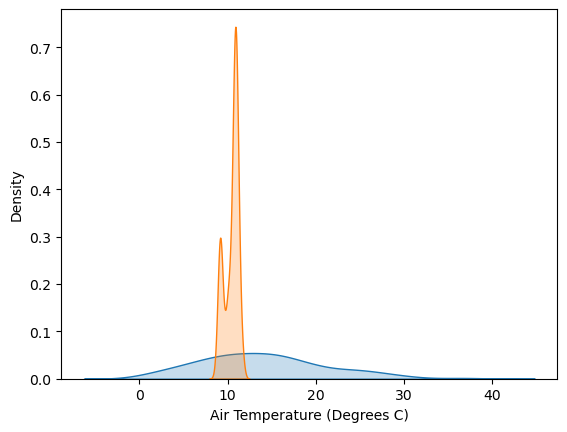

In [928]:
sns.kdeplot((values),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [929]:
loc, scale = 11.7, .76
s5 = np.random.laplace(loc, scale, 200)


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

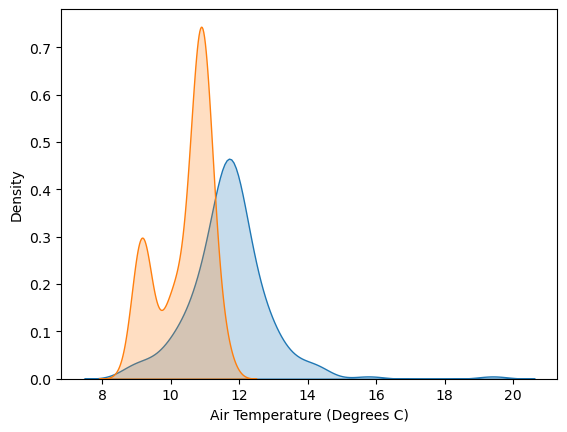

In [930]:
sns.kdeplot((s5),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [931]:
#result=pd.concat([ts1,ts2,ts3,ts4])
#result

In [932]:
import numpy as np
from scipy.stats import johnsonsu

a, b = 1.20, 1.008  # shape parameters
s6 = johnsonsu.rvs(a, b, size=100)
print(s6)

[  0.02303473  -0.6888776   -1.24658237  -3.4119166   -5.81345544
  -1.16138436   0.70605424  -4.05140088  -2.46771321  -0.63605224
  -0.11713474  -2.37820459 -15.16525744  -0.69724278   0.04581118
  -2.25727528  -4.91844285  -1.69261876  -3.83963859  -2.33449294
  -2.18941982  -7.36416164  -0.17895779  -0.79419225  -1.73454953
  -3.9258337   -5.01382875  -9.61115317   0.05172266  -1.73763677
  -1.2020513    0.39659887   0.33492277  -4.8051654   -1.59861877
  -6.15780294  -2.50527456  -2.23920388  -3.63966937  -0.35512833
  -0.57986267  -3.08150293  -1.20499108  -1.48882923  -1.14429238
  -0.89701623  -9.74806103  -1.76570783  -0.32585305   0.7366673
  -1.52391267  -0.98286059 -17.85969561 -11.68995584  -1.49875931
  -2.5553481    0.33695514  -0.85984707  -1.28900976  -1.68237949
   0.06206837  -0.82521922  -0.11725765  -0.12600593  -0.77708271
  -0.21368144  -1.05242375  -0.25761312  -1.69780447  -0.66404797
  -3.1218034   -3.71700114  -0.57576441  -0.63103137  -3.64688523
  -3.231184

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

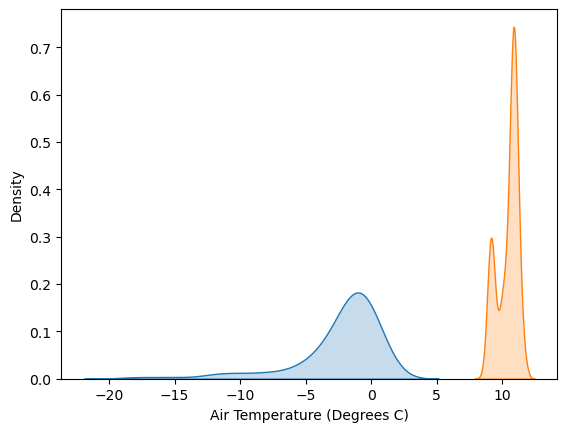

In [933]:
sns.kdeplot((s6),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

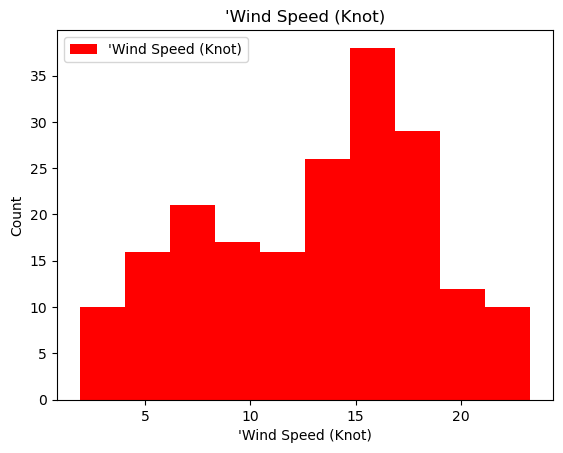

In [934]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

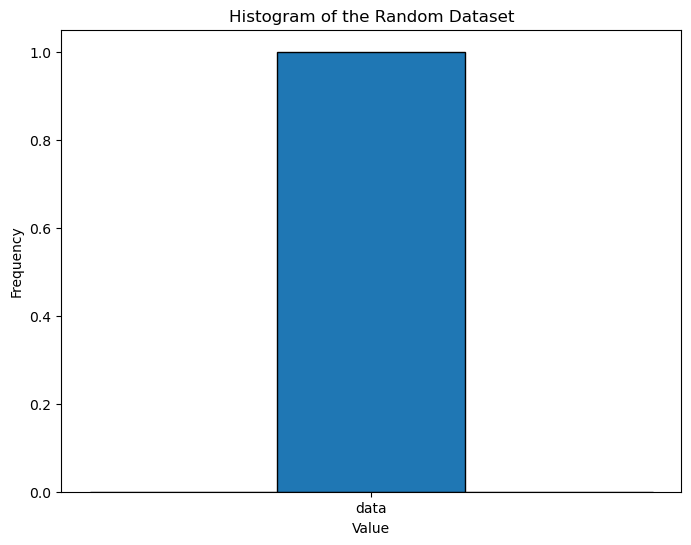

In [935]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [936]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

2.087750862824315 0 23.37814946740201


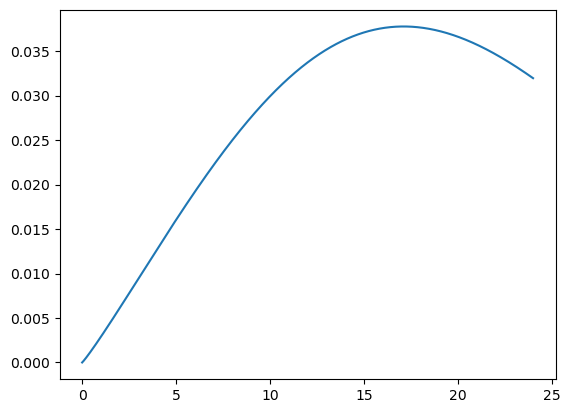

In [937]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

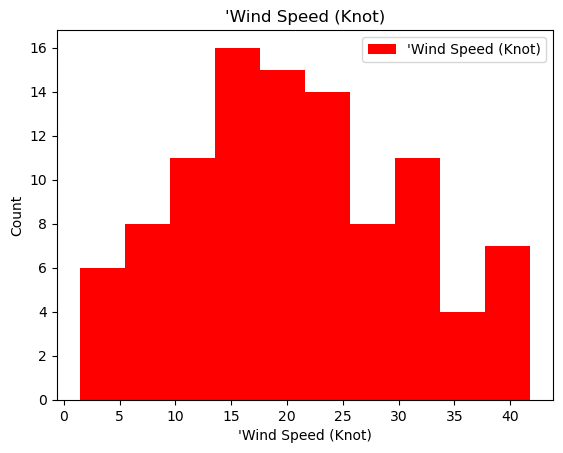

In [938]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

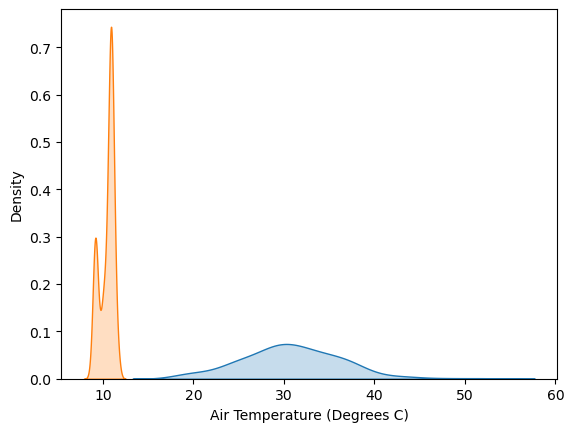

In [939]:
import numpy as np

x = np.random.poisson((30) ,size=200)


sns.kdeplot(x,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

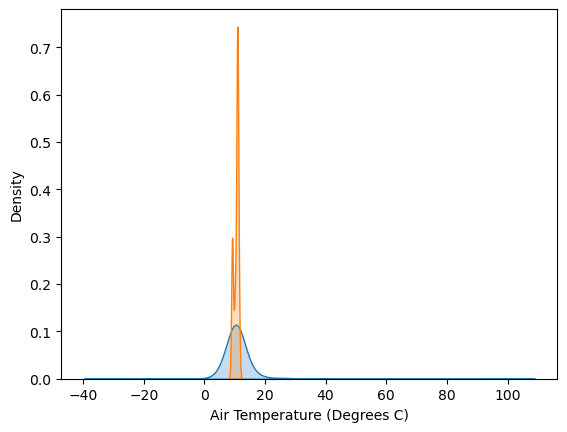

In [940]:
loc = 10.42
scale = .76

# Generate 200 random numbers from a Cauchy distribution
cauchy_data = np.random.standard_cauchy(size=200)

# Adjust the data to have the desired location and scale parameters
cauchy_data = loc + scale * cauchy_data

# Print the generated data
#print()
sns.kdeplot(cauchy_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

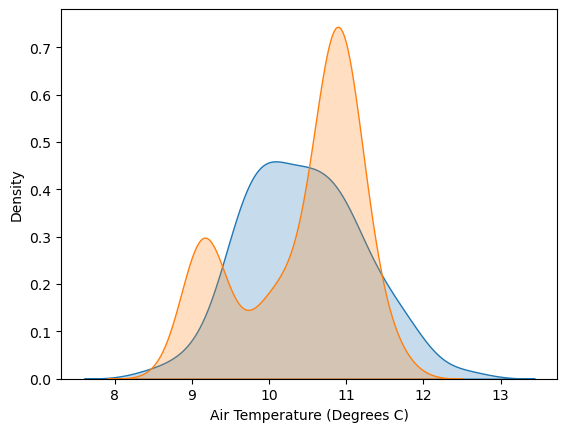

In [941]:
# Set the shape and scale parameters
shape = 1
scale = 1

# Calculate the mean and standard deviation
mean = 10.42
std_dev = 0.766

# Calculate the shape and scale parameters of the double gamma distribution
a = mean ** 2 / std_dev ** 2
b = mean / std_dev ** 2

# Generate 200 random numbers from a double gamma distribution
dgamma_data = np.random.standard_cauchy(size=100)
dgamma_data = np.random.gamma(shape=a, scale=1/b, size=100)

# Print the generated data
sns.kdeplot(dgamma_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
#print(dgamma_data)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

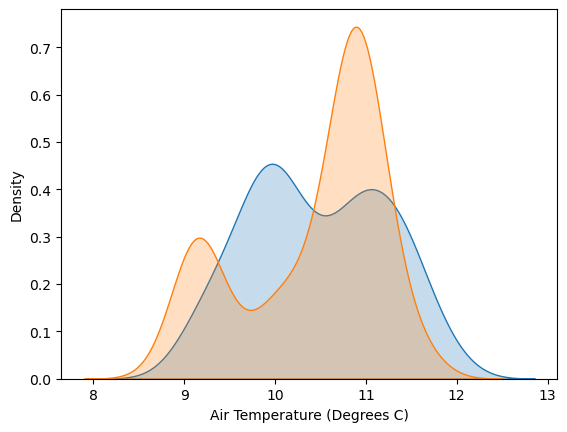

In [942]:
import numpy as np
from scipy.stats import dweibull
mean = 10.4225
std_dev = 0.7669

# Generate 1000 random numbers from the double Weibull distribution
data = dweibull.rvs(2, loc=mean, scale=std_dev, size=100)

sns.kdeplot(data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)


Rayleigh PDF 

In [943]:
import numpy as np
from scipy.stats import laplace_asymmetric

mean = 10.42
std_dev = 0.766

# Generate 1000 random numbers from the asymmetric Laplace distribution
data1 = laplace_asymmetric.rvs(1, 10.42,0.76 , size=100)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

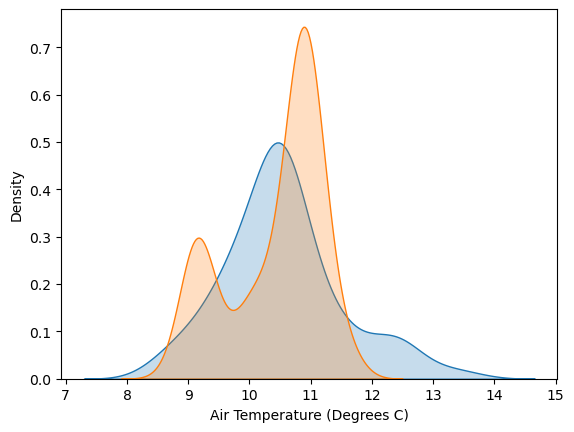

In [944]:
sns.kdeplot(data1,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

# Load the dataset
data = np.loadtxt('data.csv')

# Calculate the mean and variance of the dataset
mean = np.mean(data)
variance = np.var(data)

# Calculate the shape and scale parameters of the standard gamma distribution
k = (mean / variance) ** 2
theta = variance / mean

# Print the shape and scale parameters
print('Shape parameter (k) =', k)
print('Scale parameter (theta) =', theta)